In [1]:
import imutils
import dlib
import cv2
from scipy.spatial import distance
from imutils import face_utils


In [2]:
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

In [4]:
thresh = 0.25
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [5]:
face_utils.FACIAL_LANDMARKS_68_IDXS

OrderedDict([('mouth', (48, 68)),
             ('inner_mouth', (60, 68)),
             ('right_eyebrow', (17, 22)),
             ('left_eyebrow', (22, 27)),
             ('right_eye', (36, 42)),
             ('left_eye', (42, 48)),
             ('nose', (27, 36)),
             ('jaw', (0, 17))])

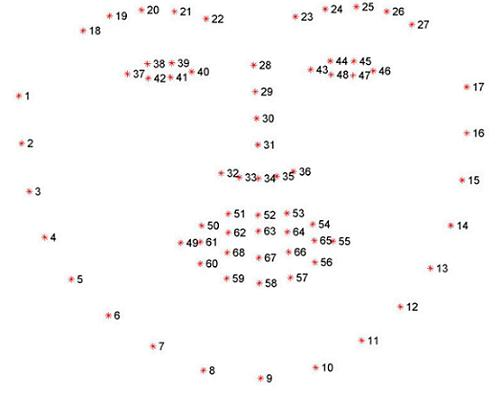

In [6]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [7]:
print(lStart, lEnd)
print(rStart, rEnd)

42 48
36 42


In [8]:
from pygame import mixer
mixer.init()
sound = mixer.Sound('alarm.wav')

pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
#from playsound import playsound

In [10]:
# Webcam setup for Face Detection
cap=cv2.VideoCapture(0)
flag=0
while True:
    ret, frame=cap.read()
    frame = imutils.resize(frame, width=450)    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Convert Image to Grayscale
    subjects = detect(gray, 0)
    

# To show only the detected face in Box (Not Mandatory)
    #print("Number of faces detected: {}".format(len(subjects)))
    for subject in subjects:
#         x1 = subject.left() # left point
#         y1 = subject.top() # top point
#         x2 = subject.right() # right point
#         y2 = subject.bottom() # bottom point
#         # Draw a rectangle
#         cv2.rectangle(img=frame, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=2)
        # show the image
    #cv2.imshow(winname="Face", mat=frame)
        
        shape = predict(gray, subject)        
        shape = face_utils.shape_to_np(shape)#converting to NumPy Array
        
        
# To show the 68 points in face (Not Mandatory)
#         print("Number of points detected: {}".format(len(shape)))
#         for n in range(0, 68):
#             (x,y) = shape[n]
#             cv2.circle(frame, (x, y), 1, (255, 255, 255), -1)
#         cv2.imshow("Detected points", frame)
 
              
        leftEye = shape[lStart:lEnd]        
        rightEye = shape[rStart:rEnd]        
        
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0
        
        leftEyeHull = cv2.convexHull(leftEye)
        #cv2.imshow("Frame-1", frame)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        #cv2.imshow("Frame-1", frame)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        
        if ear < thresh:
            flag += 1
            #print (flag)
            if flag >= frame_check:
                sound.play()
                #playsound('alarm.wav')
                cv2.putText(frame, "****************ALERT!****************", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                cv2.putText(frame, "****************ALERT!****************", (10,325),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        else:
            flag = 0
            
    cv2.imshow("Frame", frame)
    
# When everything done, release the capture    
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break